# Perform an A/B Test for an Ad Campaign

A/B testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>

<br>

#### Context
You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

# Task one : Load the dataset

In [22]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [23]:
#load the dataset
df=pd.read_excel('AB Test.xlsx')

In [24]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [25]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


# Task Two : Set up for Hypothesis Test


#### Experiment Group : 
This group that is involved in the new experiment . i.e the group that received the new ad.

#### Control Group : 
The 2nd group that didn't receive the new ad

#### Click-through Rate (CTR) : 
The number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null Hypothesis.
<br>
2) Specify the Alternative Hypothesis.
<br>
3) Set the Significance Level (This the level of confidence)
<br>
4) Calculate the  Corresponding P-Value.
<br>
5) Drawing a Conclusion



In [26]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [27]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

#### Define Null and Alternate Hypothesis

Null Hypothesis - The CTR of the new Ad is equal or less than CTR for the old Ad

Alternate Hypothesis - The CTR of the new Ad is greater than CTR for the old Ad

# Task Three : Compute the difference in the click-through rate 

We could compute the diffrence in click throughs between experiment and control group and test whether the difference is significant

In [28]:
# Get dataframe with all observations from control group 

control_df=df.query('group=="control"')

# Compute CTR for control group 

control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()

#Display the CTR For the control group
control_ctr


0.19349680170575692

In [31]:
# Get dataframe with all observations from experiment group 

experiment_df=df.query('group=="experiment"')

# Compute CTR for experiment group 

experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()

#Display the CTR For the experiment group
experiment_ctr


0.16586921850079744

In [32]:
#Compute the difference in the CTR 

diff = experiment_ctr - control_ctr

#display the difference 

diff

-0.027627583204959477

### Observations: 

The Click through of the experiment for our sample is less than that of control. The new ad is not working. But how do we generalize this and infer about the entire population?

We do not have population distribution. Hence we need to do bootstapping

# Task four : create sample distribution using bootsrapping

### Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time with replacement. This allows a given observation to be included in a given small sample more than once. This approach is called sampling with replacement.

Using Bootstrapping we can generalize the results of a sample for the entire population

<img src="files/Bootstrapping.png" width="600">

In [36]:
#bootsrapping

differences = []
size = df.shape[0]

for I in range(1000):
    sample = df.sample(size, replace=True)
    
    control_df=sample.query('group=="control"')
    experiment_df=sample.query('group=="experiment"')
    
    control_ctr = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    experiment_ctr = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()
    
    differences.append(experiment_ctr - control_ctr)
    

# Task five : Evaluate the null hypothesis and draw conclustions.

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([  7.,  29.,  66., 156., 222., 236., 174.,  82.,  23.,   5.]),
 array([-0.05655725, -0.05081563, -0.04507401, -0.03933239, -0.03359078,
        -0.02784916, -0.02210754, -0.01636592, -0.01062431, -0.00488269,
         0.00085893]),
 <BarContainer object of 10 artists>)

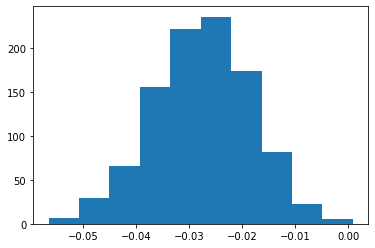

In [38]:
# Plot the sampling distribution 

differences = np.array(differences)

plt.hist(differences)

### Create a standard distribution with mean = 0 and std equal to the distribution above.

This is because the null hypothesis says the New Ad makes no improvement to the click through rates. Hence mean = 0

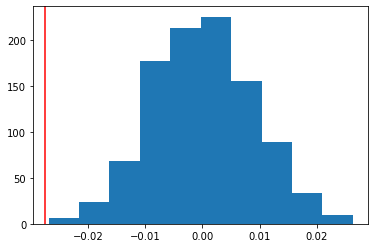

In [40]:
#simulate the distribution under the null hypothesis 

null_hypothesis = np.random.normal(0, differences.std(), differences.size)

#plot the null distribution 

plt.hist(null_hypothesis)
plt.axvline(diff, c='red')

From this plot we can conclude that the null hypothesis is true most of the time. It is time to compute the p value of our diff statistic

The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%. i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [41]:
# Compute the  P-value 

(null_hypothesis > diff).mean()

1.0

We need this value to be smaller than 0.05 to reject null hypothesis.
With this result, we fail to reject the Null hypothesis.
Only when Null hypothesis is true less than 5% time, we reject it

### Conlcusion: 
Do not go with the new Ad